In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
intensity = ctrl.Antecedent(np.arange(0, 101, 1), 'Light Intensity')
preference = ctrl.Antecedent(np.arange(0, 11, 1), 'User Preference')
brightness = ctrl.Consequent(np.arange(0, 101, 1), 'Brightness')

In [4]:
intensity['low'] = fuzz.trimf(intensity.universe, [0, 0, 50])
intensity['medium'] = fuzz.trimf(intensity.universe, [20, 50, 80])
intensity['high'] = fuzz.trimf(intensity.universe, [50, 100, 100])

In [5]:
preference['dark'] = fuzz.trimf(preference.universe, [0, 0, 5])
preference['normal'] = fuzz.trimf(preference.universe, [2, 5, 8])
preference['bright'] = fuzz.trimf(preference.universe, [5, 10, 10])

In [6]:
brightness['low'] = fuzz.trimf(brightness.universe, [0, 0, 50])
brightness['medium'] = fuzz.trimf(brightness.universe, [20, 50, 80])
brightness['high'] = fuzz.trimf(brightness.universe, [50, 100, 100])

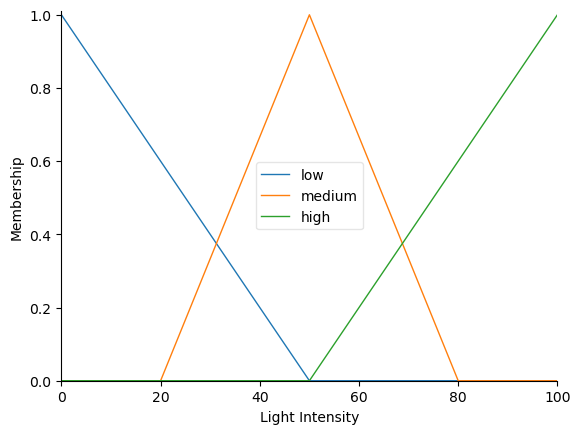

In [8]:
intensity.view()

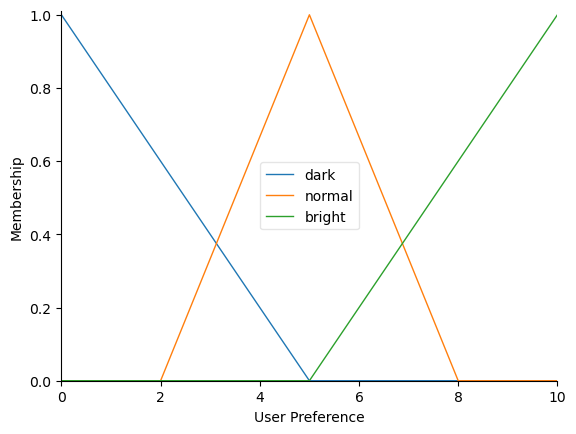

In [9]:
preference.view()

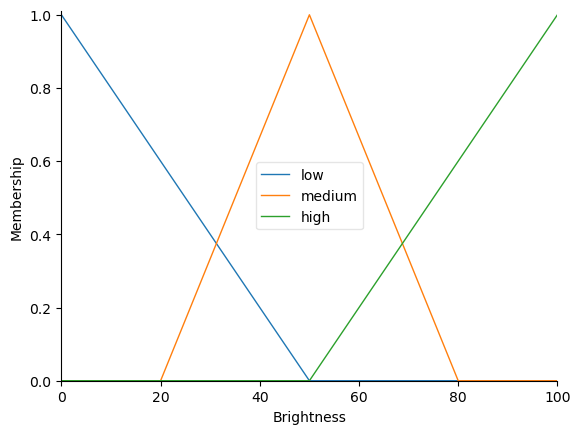

In [10]:
brightness.view()

In [11]:
rule1 = ctrl.Rule(antecedent=(intensity['low'] & preference['dark']), consequent=brightness['low'])
rule2 = ctrl.Rule(antecedent=(intensity['low'] & preference['normal']), consequent=brightness['low'])
rule3 = ctrl.Rule(antecedent=(intensity['low'] & preference['bright']), consequent=brightness['medium'])

rule4 = ctrl.Rule(antecedent=(intensity['medium'] & preference['dark']), consequent=brightness['low'])
rule5 = ctrl.Rule(antecedent=(intensity['medium'] & preference['normal']), consequent=brightness['medium'])
rule6 = ctrl.Rule(antecedent=(intensity['medium'] & preference['bright']), consequent=brightness['high'])

rule7 = ctrl.Rule(antecedent=(intensity['high'] & preference['dark']), consequent=brightness['medium'])
rule8 = ctrl.Rule(antecedent=(intensity['high'] & preference['normal']), consequent=brightness['high'])
rule9 = ctrl.Rule(antecedent=(intensity['high'] & preference['bright']), consequent=brightness['high'])

In [12]:
brightnessVal = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
bright = ctrl.ControlSystemSimulation(brightnessVal)

In [16]:
bright.input['Light Intensity'] = 30
bright.input['User Preference'] = 9
bright.compute()

In [17]:
print(bright.output['Brightness'])

61.29943502824865


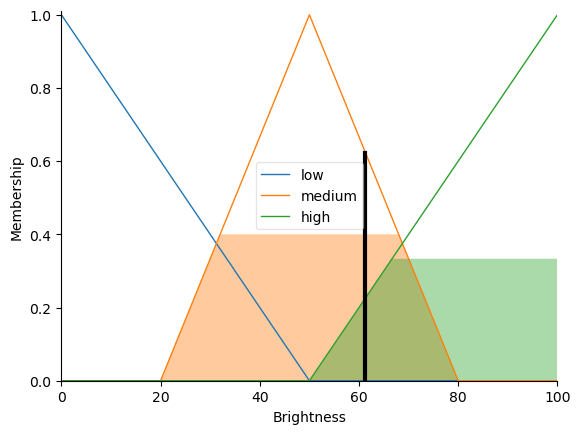

In [18]:
brightness.view(sim=bright)